In [12]:
import pandas as pd

In [49]:
df = pd.read_csv('Vehicle.csv')

In [50]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
fuel_encoder = LabelEncoder()
seller_type_encoder = LabelEncoder()
transmission_encoder = LabelEncoder()
owner_encoder = LabelEncoder()

In [53]:
df.isnull().sum()

name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
selling_price    0
dtype: int64

In [54]:
df["fuel"] = fuel_encoder.fit_transform(df["fuel"])
df["seller_type"] = seller_type_encoder.fit_transform(df["seller_type"])
df["transmission"] = transmission_encoder.fit_transform(df["transmission"])
df["owner"] = owner_encoder.fit_transform(df["owner"])

In [55]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,4,1,1,0,60000
1,Maruti Wagon R LXI Minor,2007,50000,4,1,1,0,135000
2,Hyundai Verna 1.6 SX,2012,100000,1,1,1,0,600000
3,Datsun RediGO T Option,2017,46000,4,1,1,0,250000
4,Honda Amaze VX i-DTEC,2014,141000,1,1,1,2,450000


In [48]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [63]:
X = df.drop(columns=["name","selling_price"],axis=1)

In [64]:
X_transformed = scaler.fit_transform(X)

In [66]:
X_transformed

array([[-1.44507431,  0.08113906,  1.01499338,  0.44819164,  0.33927557,
        -0.66507931],
       [-1.44507431, -0.3476891 ,  1.01499338,  0.44819164,  0.33927557,
        -0.66507931],
       [-0.2587948 ,  0.7243813 , -0.97405145,  0.44819164,  0.33927557,
        -0.66507931],
       ...,
       [-0.97056251,  0.35987736,  1.01499338,  0.44819164,  0.33927557,
         0.95651856],
       [ 0.69022881,  0.50996722, -0.97405145,  0.44819164,  0.33927557,
        -0.66507931],
       [ 0.69022881, -0.56210318,  1.01499338,  0.44819164,  0.33927557,
        -0.66507931]])

In [70]:
import numpy as np

In [78]:
corr = np.cov(X_transformed.T)

In [82]:
corr

array([[ 1.00023047, -0.41978487, -0.12002956, -0.09837418, -0.14383357,
        -0.41480074],
       [-0.41978487,  1.00023047, -0.28616084,  0.11371562,  0.12025394,
         0.29718352],
       [-0.12002956, -0.28616084,  1.00023047,  0.03880568,  0.03925776,
        -0.01091286],
       [-0.09837418,  0.11371562,  0.03880568,  1.00023047,  0.17496526,
         0.1657189 ],
       [-0.14383357,  0.12025394,  0.03925776,  0.17496526,  1.00023047,
         0.0789108 ],
       [-0.41480074,  0.29718352, -0.01091286,  0.1657189 ,  0.0789108 ,
         1.00023047]])

In [83]:
eigenvalues,eigenvectors = np.linalg.eig(corr)

In [85]:
eigenvectors

array([[ 0.55395421, -0.63959818, -0.1360842 ,  0.31257648,  0.37466442,
        -0.16568797],
       [-0.53096891, -0.59879459, -0.39469007, -0.4384931 ,  0.03066815,
         0.10256736],
       [ 0.07942029, -0.43580957,  0.78439971, -0.22162124, -0.37014794,
         0.04851866],
       [-0.27348132,  0.09273171,  0.32287912, -0.20721565,  0.55097103,
        -0.68253239],
       [-0.25845719, -0.00791707,  0.32219762,  0.2287736 ,  0.58599024,
         0.65848613],
       [-0.51313449, -0.18375901,  0.04853561,  0.75208249, -0.27335491,
        -0.24539546]])

In [86]:
sorted_indices = np.argsort(eigenvalues)[::-1]

In [87]:
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [88]:
projection_matrix = sorted_eigenvectors[:, :2]

In [89]:
projection_matrix

array([[ 0.55395421, -0.1360842 ],
       [-0.53096891, -0.39469007],
       [ 0.07942029,  0.78439971],
       [-0.27348132,  0.32287912],
       [-0.25845719,  0.32219762],
       [-0.51313449,  0.04853561]])

In [90]:
X_pca = X_transformed.dot(projection_matrix)

In [91]:
import plotly.express as px

In [93]:
df_plot = pd.DataFrame(
    {
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    }
)

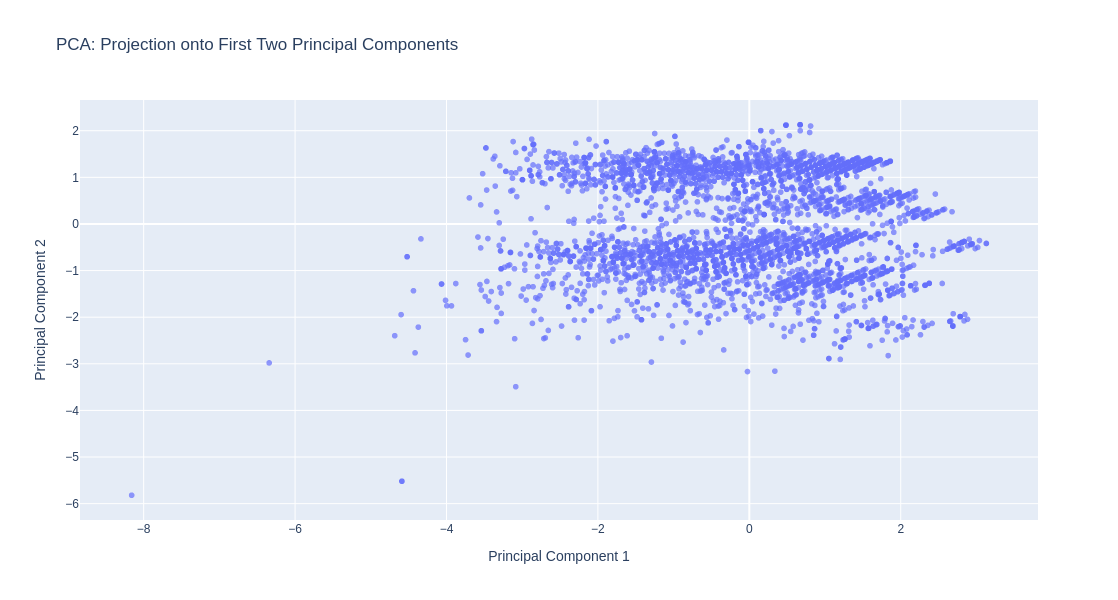

In [110]:
plt1 = px.scatter(df_plot,x="PC1",y="PC2",title='PCA: Projection onto First Two Principal Components',
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'},
                 opacity=0.7)
plt1.update_layout(
    width=1000,  # Set the width of the plot
    height=600,  # Set the height of the plot
)


In [111]:
total_variance = np.sum(sorted_eigenvalues)

In [113]:
variance_explained = sorted_eigenvalues / total_variance

In [114]:
print(f"Variance explained by PC1: {variance_explained[0]:.4f}")
print(f"Variance explained by PC2: {variance_explained[1]:.4f}")
print(f"Total variance explained by first two PCs: {variance_explained[:2].sum():.4f}")

Variance explained by PC1: 0.3141
Variance explained by PC2: 0.1994
Total variance explained by first two PCs: 0.5135


Interpretation:

    The first two PCs capture this fraction of total variance.

    A higher explained variance means the 2D projection retains most of the data's variability.

    By examining the PCA plot, you can detect clusters, trends, or outliers in the dataset.

    If certain features load heavily on a PC (from eigenvectors), it hints at their strong influence in that principal component.

9. PCA in supervised vs. unsupervised learning

    Unsupervised: PCA is mainly used here for dimensionality reduction, visualization, or noise reduction without considering labels. It identifies directions (principal components) that capture maximum variance in the input features alone.

    Supervised: PCA does not use class labels, so it might not find components that best separate classes. Sometimes PCA is combined with supervised techniques or replaced by supervised dimension reduction methods (like LDA - Linear Discriminant Analysis) which use labels to find directions that best discriminate classes.

